# Import các thư viện cần thiết cho đồ án, khám phá dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from scipy import stats
import statsmodels.api as sm
import math
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/2425_QC.csv'

In [ ]:
df = pd.read_csv(file_path)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
997,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/4/2016 2:07,1
998,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/2/2016 17:24,1
999,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/3/2016 2:35,0
1000,45.01,NaN,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,3/6/2016 21:43,1


In [ ]:
print(df.shape)
print(df.columns)

(1002, 10)
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column} -> {num_distinct_values} distinct values\n")

Daily Time Spent on Site -> 900 distinct values

Age -> 44 distinct values

Area Income -> 1000 distinct values

Daily Internet Usage -> 966 distinct values

Ad Topic Line -> 1000 distinct values

City -> 969 distinct values

Male -> 2 distinct values

Country -> 237 distinct values

Timestamp -> 997 distinct values

Clicked on Ad -> 2 distinct values



# Kiểm tra dữ liệu missing, duplicates, outliers

In [ ]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,1
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [ ]:
df[df.isnull().any(axis=1)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1000,45.01,NaN,29875.8,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,3/6/2016 21:43,1


In [ ]:
df[df.duplicated(keep=False)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
727,81.17,30.0,57195.96,231.91,Optimized static archive,Dayton,1,United States Minor Outlying Islands,3/6/2016 7:00,0
755,81.17,30.0,57195.96,231.91,Optimized static archive,Dayton,1,United States Minor Outlying Islands,3/6/2016 7:00,0
817,36.91,48.0,54645.20,159.69,Ameliorated coherent open architecture,North Samantha,0,Zimbabwe,24/2/2016 7:13,1
1001,36.91,48.0,54645.20,159.69,Ameliorated coherent open architecture,North Samantha,0,Zimbabwe,24/2/2016 7:13,1


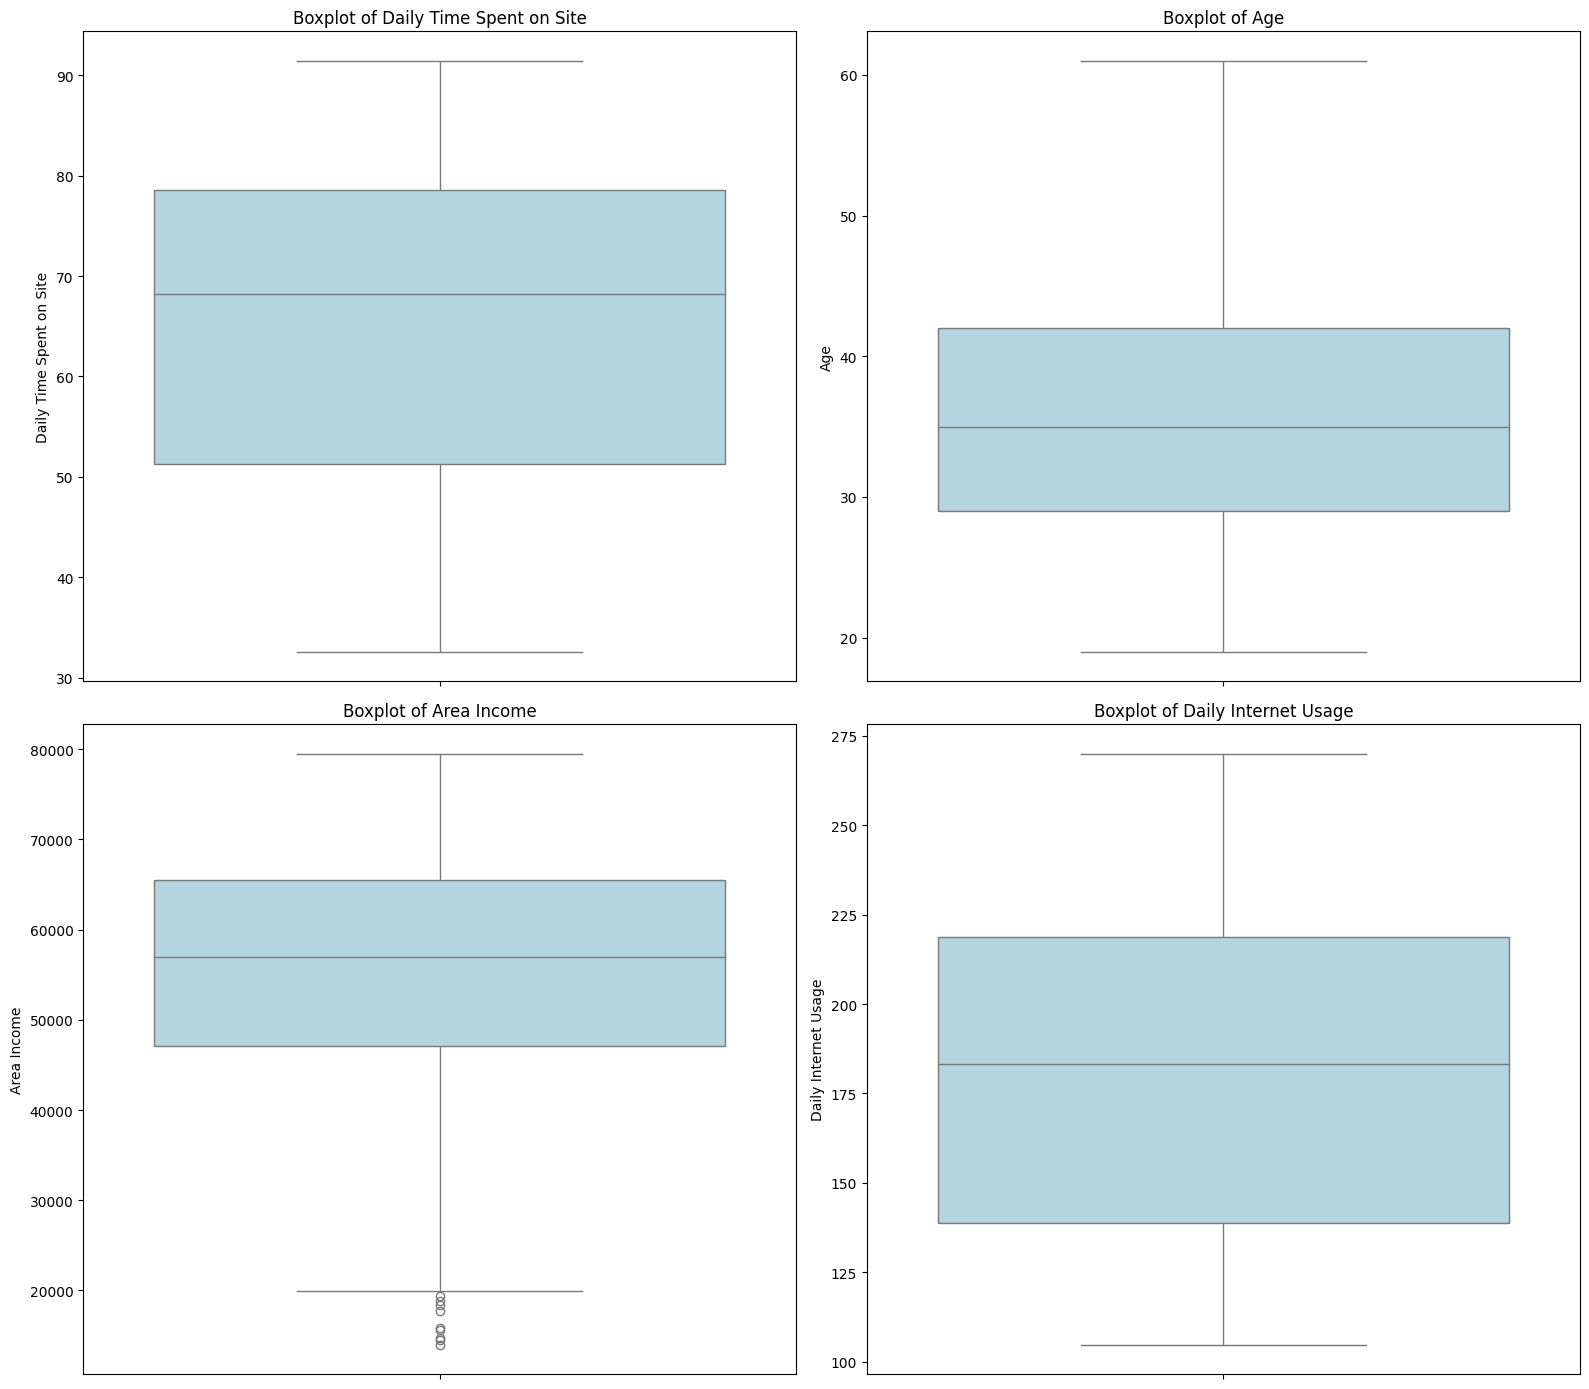

In [ ]:
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cols = 2
rows = math.ceil(len(numerical_columns) / cols)

plt.figure(figsize=(16, 14))
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)

    sns.boxplot(y=df[column], color='lightblue')

    plt.title(f'Boxplot of {column}', fontsize=12)

plt.tight_layout()
plt.show()

# Kiểm tra sự cân bằng giữa nhãn: click/không click quảng cáo

In [ ]:
value_counts = df['Clicked on Ad'].value_counts()
print(value_counts)

total = len(df['Clicked on Ad'])
proportion_0 = value_counts[0] / total
proportion_1 = value_counts[1] / total

print(proportion_0)
print(proportion_1)

if abs(proportion_0 - proportion_1) < 0.05:
    print("Nhãn click và không click cân bằng.")
else:
    print("Nhãn click và không click không cân bằng.")


Clicked on Ad
0    501
1    501
Name: count, dtype: int64
0.5
0.5
Nhãn click và không click cân bằng.


# Xử lý dữ liệu missing, duplicates, outliers

In [ ]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

df['Age'].fillna(df['Age'].median(), inplace=True)

36.02497502497503
35.0
0    31.0
Name: Age, dtype: float64


<ipython-input-14-b39c2cd16c11>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [ ]:
df_unique = df.drop_duplicates()
df_unique[df_unique.duplicated(keep=False)]
df_unique

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
996,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/2/2016 21:49,1
997,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/4/2016 2:07,1
998,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/2/2016 17:24,1
999,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/3/2016 2:35,0


In [ ]:
value_counts = df_unique['Clicked on Ad'].value_counts()
print(value_counts)

total = len(df_unique['Clicked on Ad'])
proportion_0 = value_counts[0] / total
proportion_1 = value_counts[1] / total

print(proportion_0)
print(proportion_1)

if abs(proportion_0 - proportion_1) < 0.05:
    print("Nhãn click và không click cân bằng.")
else:
    print("Nhãn click và không click không cân bằng.")


Clicked on Ad
0    500
1    500
Name: count, dtype: int64
0.5
0.5
Nhãn click và không click cân bằng.


# Phân tích đơn biến (Univariate Analysis), Bivariate Analysis

In [ ]:
df_unique[['Date', 'Time']] = df_unique['Timestamp'].str.split(' ', expand=True)
df_unique

<ipython-input-18-9c6112bbe40d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[['Date', 'Time']] = df_unique['Timestamp'].str.split(' ', expand=True)
<ipython-input-18-9c6112bbe40d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[['Date', 'Time']] = df_unique['Timestamp'].str.split(' ', expand=True)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0,27/3/2016,0:53
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,4/4/2016,1:39
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0,13/3/2016,20:35
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0,10/1/2016,2:31
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0,3/6/2016,3:36
...,...,...,...,...,...,...,...,...,...,...,...,...
996,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/2/2016 21:49,1,11/2/2016,21:49
997,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/4/2016 2:07,1,22/4/2016,2:07
998,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/2/2016 17:24,1,1/2/2016,17:24
999,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/3/2016 2:35,0,24/3/2016,2:35


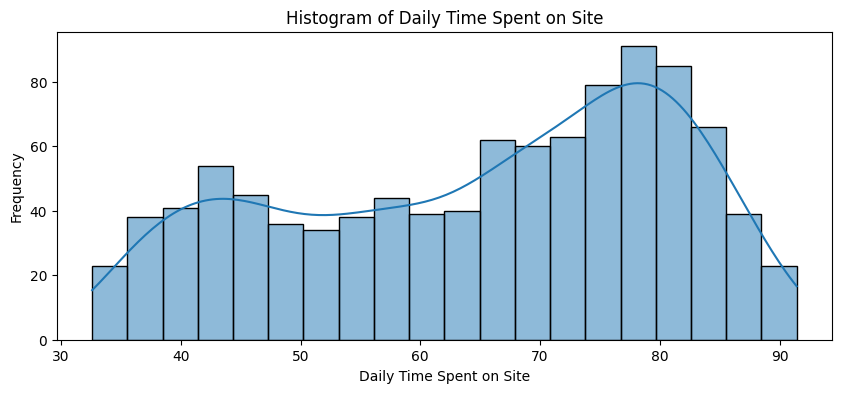

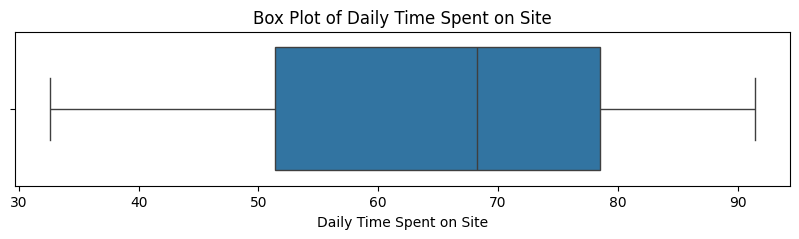

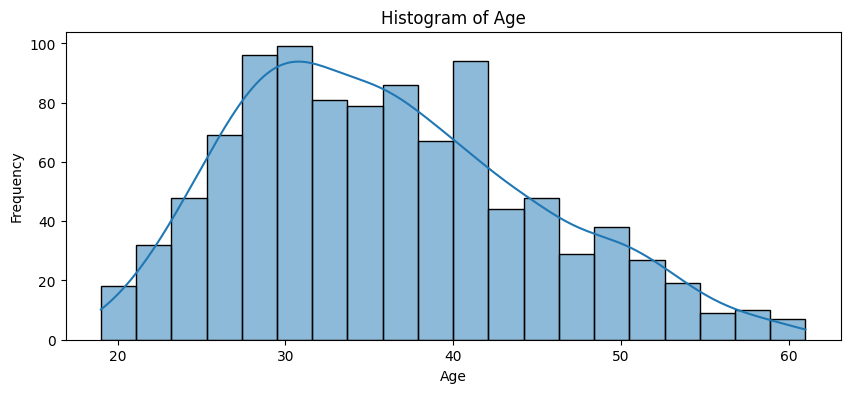

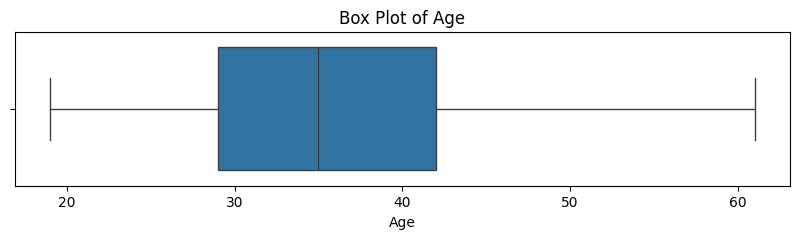

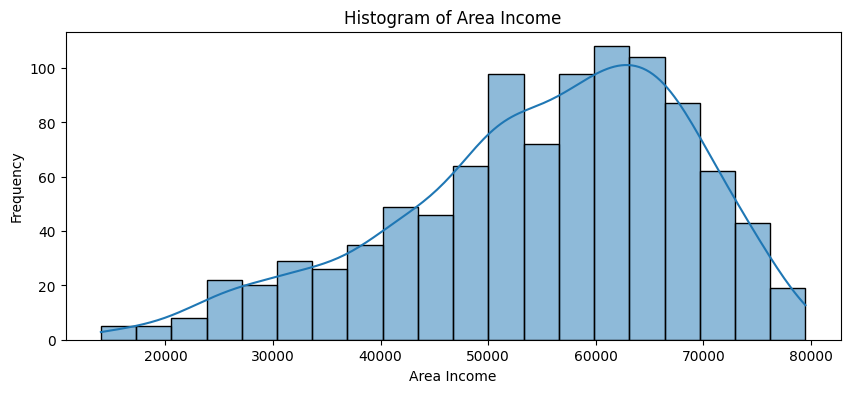

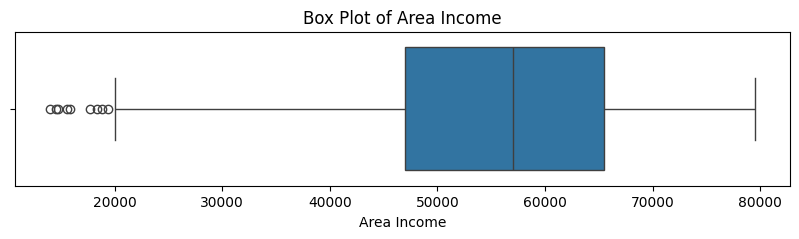

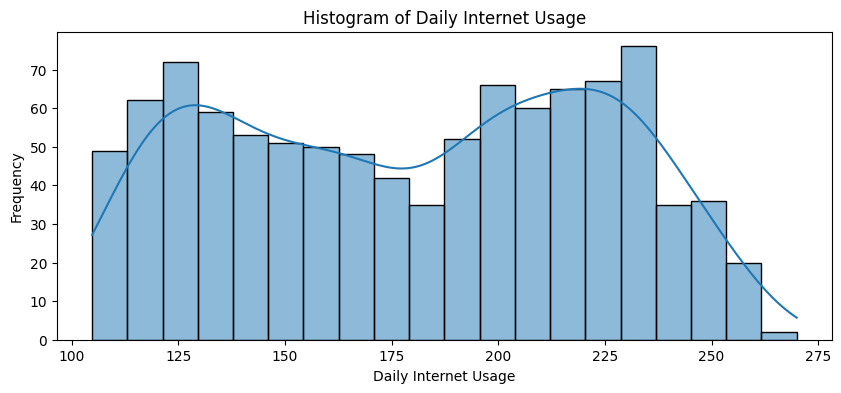

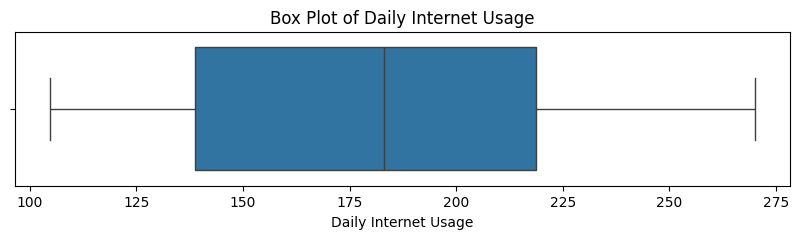

In [ ]:
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
for col in numeric_cols:
    # Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df_unique[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df_unique[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

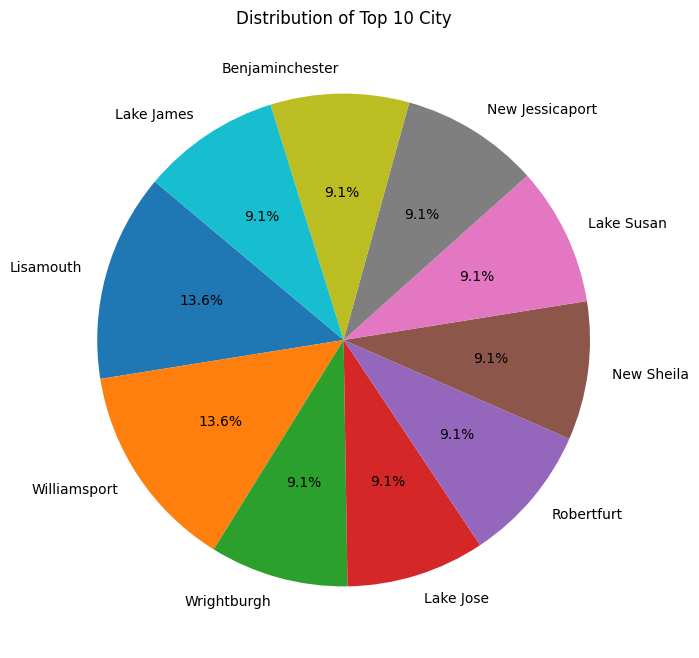

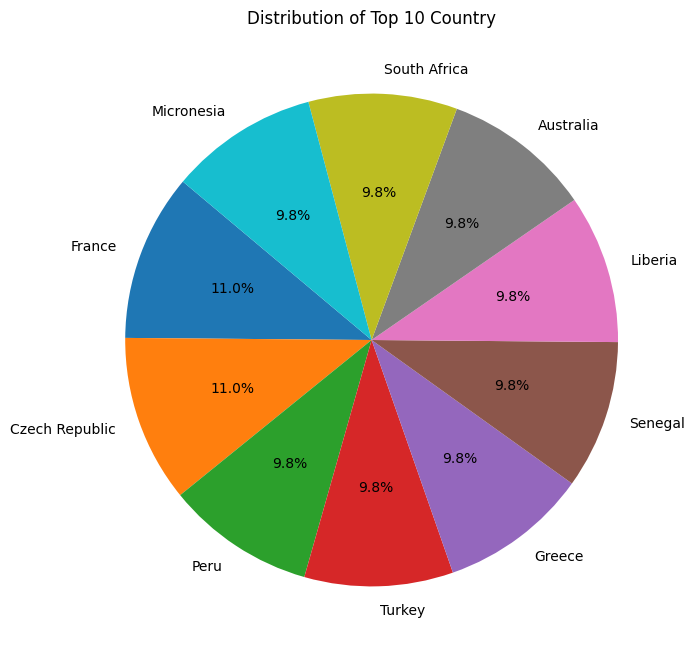

In [ ]:
categorical_cols = ['City', 'Country']

for col in categorical_cols:

    top_values = df_unique[col].value_counts().nlargest(10)

    plt.figure(figsize=(8, 8))
    plt.pie(
        top_values,
        labels=top_values.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Distribution of Top 10 {col}')
    plt.show()

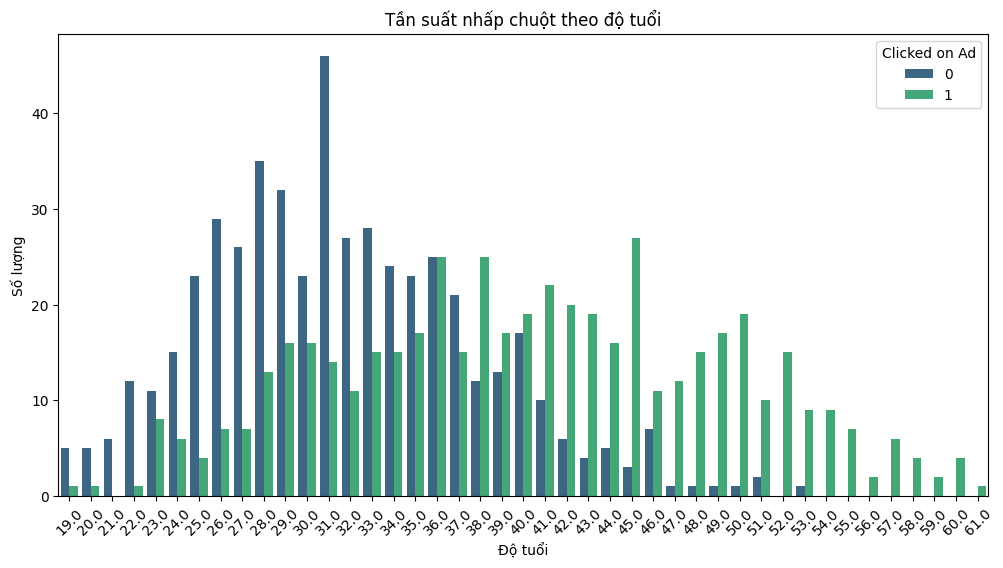

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Clicked on Ad', data=df_unique, palette='viridis')
plt.title('Tần suất nhấp chuột theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-f81b2bfb7ddd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Age', data=df_unique, palette='viridis')


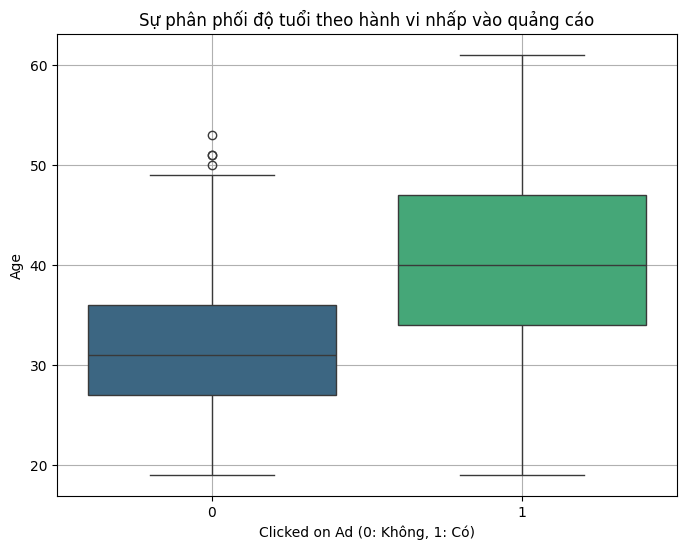

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Clicked on Ad', y='Age', data=df_unique, palette='viridis')
plt.title('Sự phân phối độ tuổi theo hành vi nhấp vào quảng cáo')
plt.xlabel('Clicked on Ad (0: Không, 1: Có)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [ ]:
bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
labels = ['10k-20k','20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k']

# Tạo một cột mới với các khoảng
df_unique['Income Group'] = pd.cut(df['Area Income'], bins=bins, labels=labels, right=False)
df_unique

<ipython-input-23-dcfbabfa5a27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Income Group'] = pd.cut(df['Area Income'], bins=bins, labels=labels, right=False)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time,Income Group
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0,27/3/2016,0:53,60k-70k
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,4/4/2016,1:39,60k-70k
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0,13/3/2016,20:35,50k-60k
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0,10/1/2016,2:31,50k-60k
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0,3/6/2016,3:36,70k-80k
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/2/2016 21:49,1,11/2/2016,21:49,70k-80k
997,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/4/2016 2:07,1,22/4/2016,2:07,60k-70k
998,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/2/2016 17:24,1,1/2/2016,17:24,40k-50k
999,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/3/2016 2:35,0,24/3/2016,2:35,40k-50k


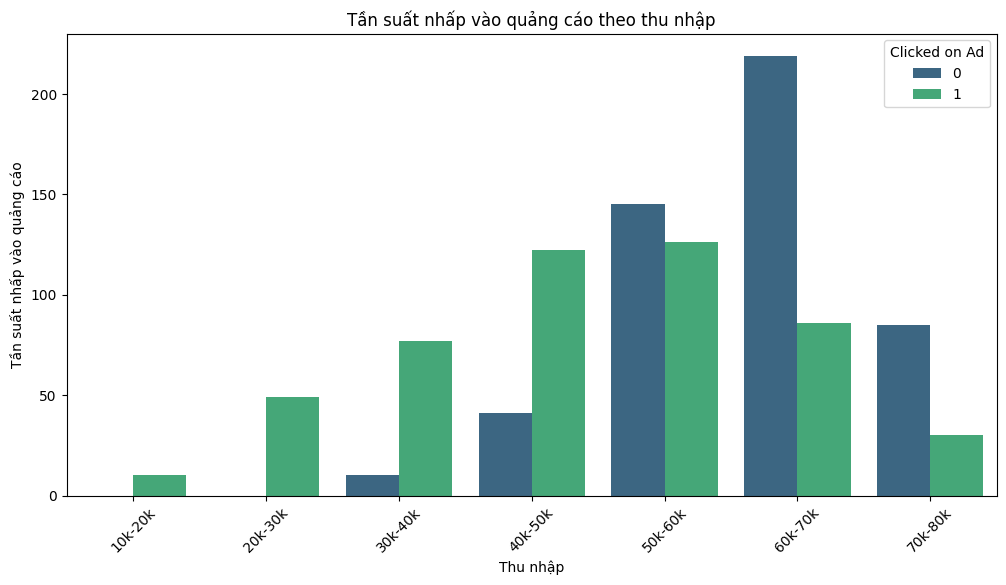

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Income Group', hue='Clicked on Ad', data=df_unique, palette='viridis')
plt.title('Tần suất nhấp vào quảng cáo theo thu nhập')
plt.xlabel('Thu nhập')
plt.ylabel('Tần suất nhấp vào quảng cáo')
plt.xticks(rotation=45)
plt.show()

<ipython-input-25-b16b30216398>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Area Income', data=df_unique, palette='viridis')


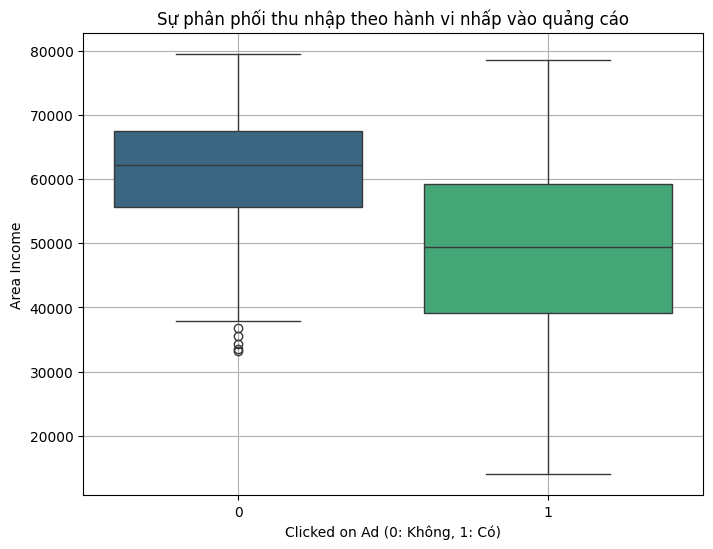

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Clicked on Ad', y='Area Income', data=df_unique, palette='viridis')
plt.title('Sự phân phối thu nhập theo hành vi nhấp vào quảng cáo')
plt.xlabel('Clicked on Ad (0: Không, 1: Có)')
plt.ylabel('Area Income')
plt.grid(True)
plt.show()

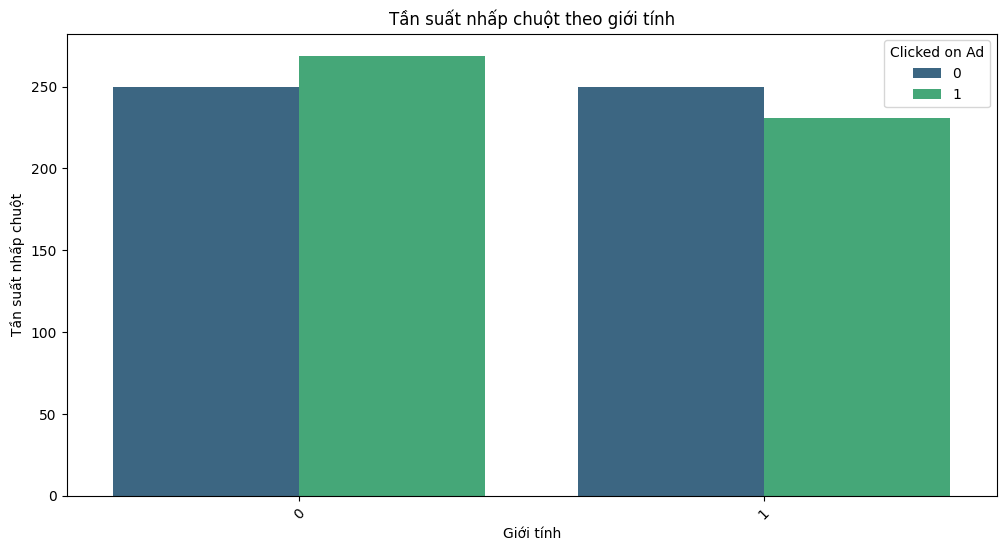

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Male', hue='Clicked on Ad', data=df_unique, palette='viridis')
plt.title('Tần suất nhấp chuột theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tần suất nhấp chuột')
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-b681c22682d2>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_unique['Date'] = pd.to_datetime(df_unique['Date'], errors='coerce')
<ipython-input-27-b681c22682d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Date'] = pd.to_datetime(df_unique['Date'], errors='coerce')
<ipython-input-27-b681c22682d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[

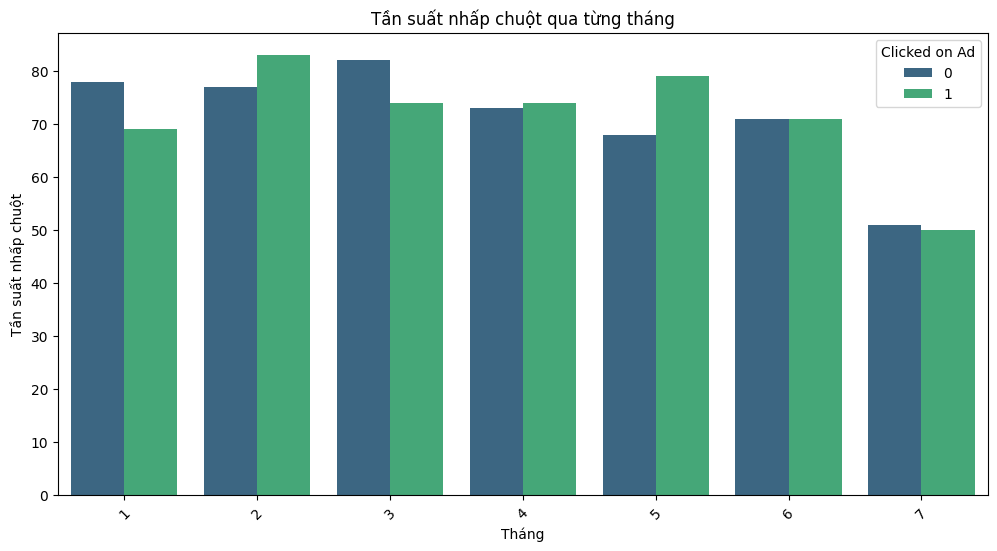

In [ ]:
df_unique['Date'] = pd.to_datetime(df_unique['Date'], errors='coerce')

df_unique['Date'] = df_unique['Date'].dt.date

df_unique['Month'] = pd.to_datetime(df_unique['Date']).dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Clicked on Ad', data=df_unique, palette='viridis')
plt.title('Tần suất nhấp chuột qua từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Tần suất nhấp chuột')
plt.xticks(rotation=45)
plt.show()

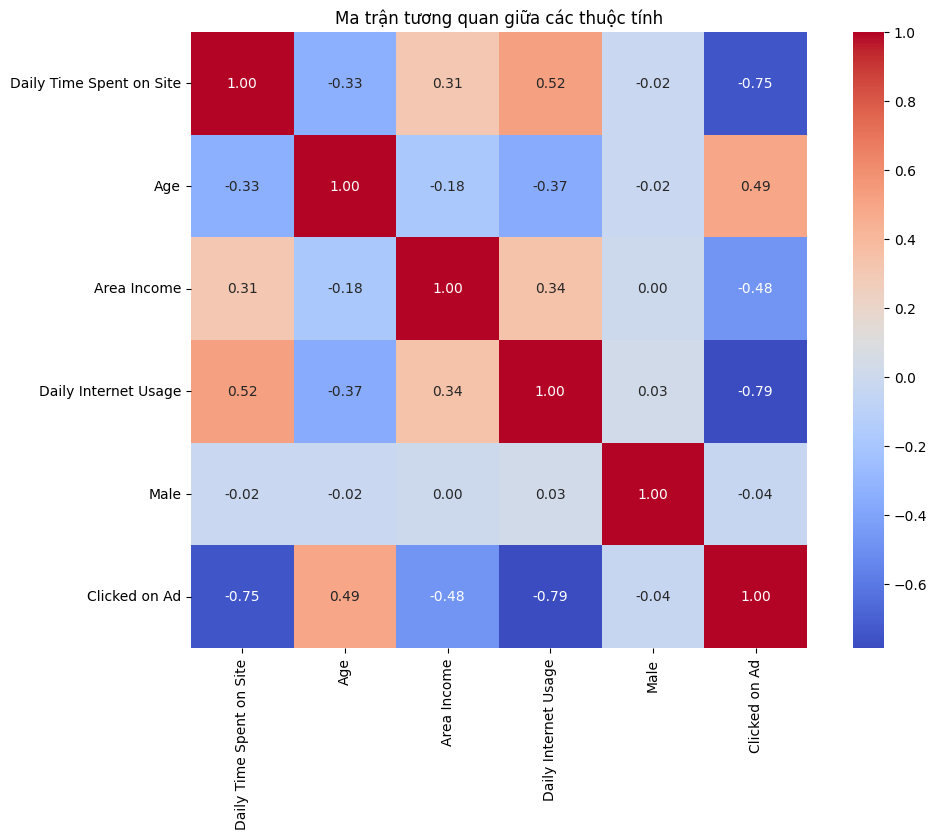

In [ ]:
numerical_df = df_unique.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

# Quan sát và nhận xét về:
▪ Thời gian sử dụng website theo độ tuổi, theo thu nhập hoặc theo
thành phố sinh sống.

▪ Thời điểm trong ngày (sáng, trưa, chiều, tối)

▪ Chủ đề quảng cáo được quan tâm nhất hoặc ít được quan tâm nhất

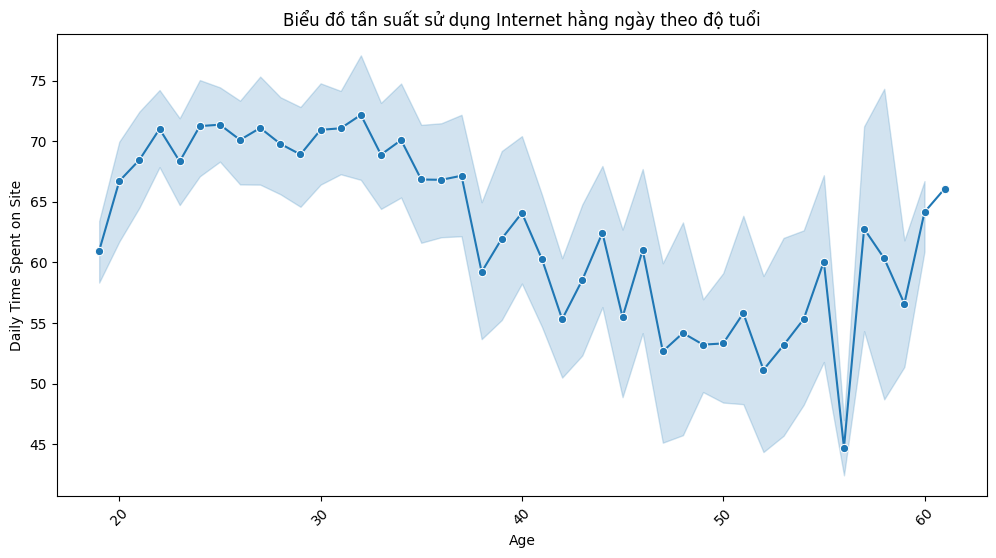

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Daily Time Spent on Site', data=df_unique, marker='o')
plt.title('Biểu đồ tần suất sử dụng Internet hằng ngày theo độ tuổi')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')
plt.xticks(rotation=45)
plt.show()

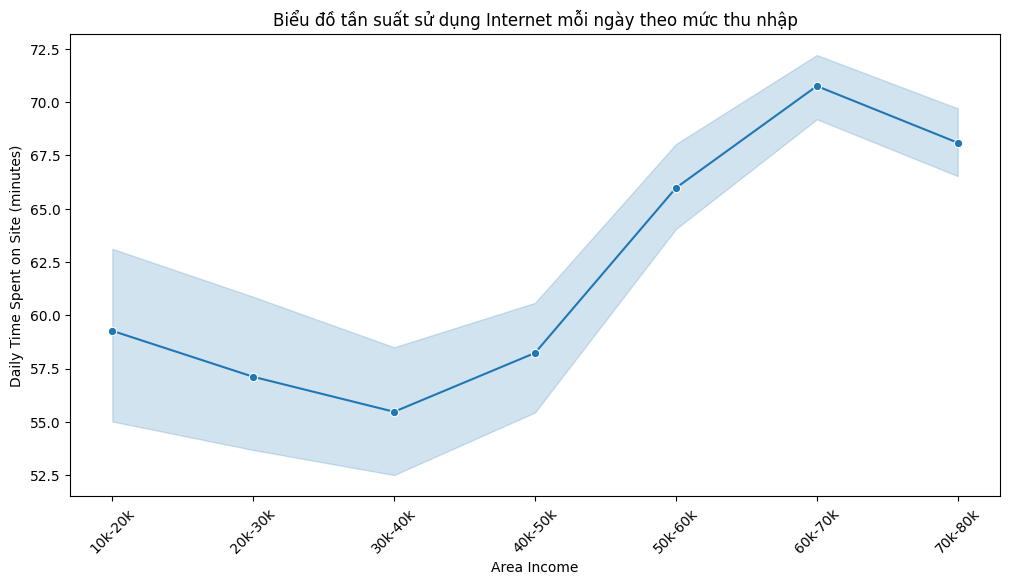

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Income Group', y='Daily Time Spent on Site', data=df_unique, marker='o')
plt.title('Biểu đồ tần suất sử dụng Internet mỗi ngày theo mức thu nhập')
plt.xlabel('Area Income')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.xticks(rotation=45)
plt.show()


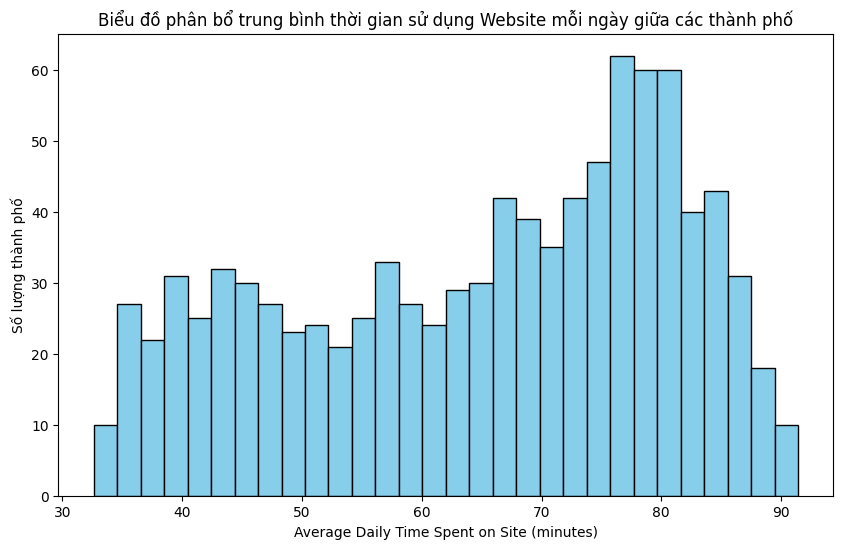

In [ ]:
avg_usage_by_city = df_unique.groupby('City')['Daily Time Spent on Site'].mean()

plt.figure(figsize=(10, 6))
plt.hist(avg_usage_by_city, bins=30, color='skyblue', edgecolor='black')
plt.title('Biểu đồ phân bổ trung bình thời gian sử dụng Website mỗi ngày giữa các thành phố')
plt.xlabel('Average Daily Time Spent on Site (minutes)')
plt.ylabel('Số lượng thành phố')
plt.show()


<ipython-input-32-3e35446057d2>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Daily Time Spent on Site', data=filtered_df, palette='viridis', ci=None)
<ipython-input-32-3e35446057d2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Daily Time Spent on Site', data=filtered_df, palette='viridis', ci=None)


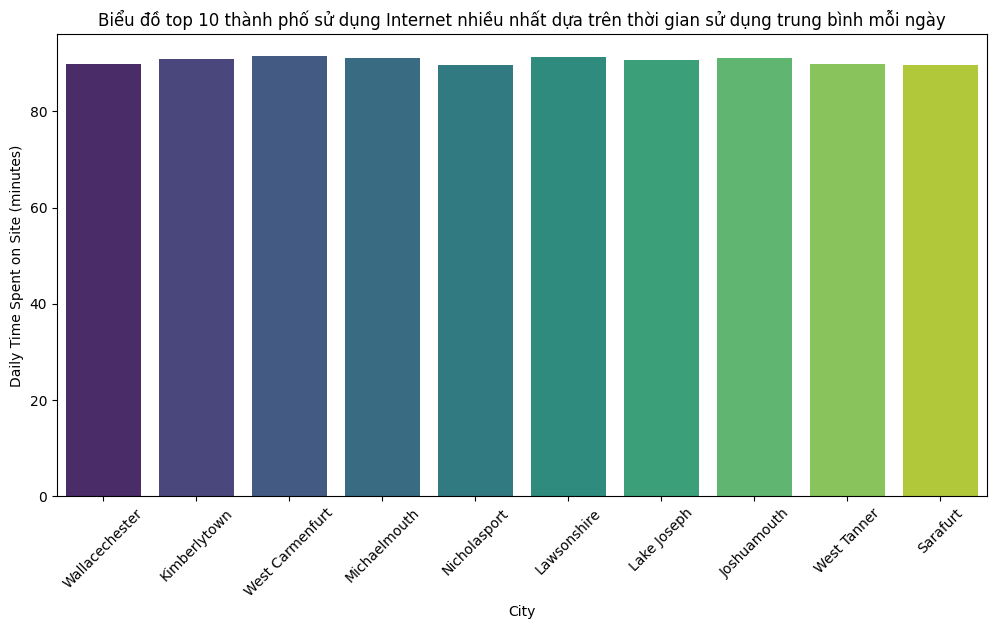

In [ ]:
avg_usage_by_city = df_unique.groupby('City')['Daily Time Spent on Site'].mean()

top_10_cities = avg_usage_by_city.nlargest(10).index

filtered_df = df_unique[df_unique['City'].isin(top_10_cities)]

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Daily Time Spent on Site', data=filtered_df, palette='viridis', ci=None)
plt.title('Biểu đồ top 10 thành phố sử dụng Internet nhiều nhất dựa trên thời gian sử dụng trung bình mỗi ngày')
plt.xlabel('City')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
def time_group(hour):
    if 0 <= hour < 10:
        return 'Sáng'
    elif 10 <= hour < 13:
        return 'Trưa'
    elif 13 <= hour < 18:
        return 'Chiều'
    else:
        return 'Tối'


df_unique['Hour'] = pd.to_datetime(df_unique['Time'], format='%H:%M').dt.hour
df_unique['Time Group'] = df_unique['Hour'].apply(time_group)

<ipython-input-33-09abc0ba63e2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Hour'] = pd.to_datetime(df_unique['Time'], format='%H:%M').dt.hour
<ipython-input-33-09abc0ba63e2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Time Group'] = df_unique['Hour'].apply(time_group)


In [ ]:
df_unique

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time,Income Group,Month,Hour,Time Group
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0,2016-03-27,0:53,60k-70k,3,0,Sáng
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,2016-04-04,1:39,60k-70k,4,1,Sáng
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0,2016-03-13,20:35,50k-60k,3,20,Tối
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0,2016-01-10,2:31,50k-60k,1,2,Sáng
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0,2016-06-03,3:36,70k-80k,6,3,Sáng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/2/2016 21:49,1,2016-02-11,21:49,70k-80k,2,21,Tối
997,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/4/2016 2:07,1,2016-04-22,2:07,60k-70k,4,2,Sáng
998,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/2/2016 17:24,1,2016-02-01,17:24,40k-50k,2,17,Chiều
999,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/3/2016 2:35,0,2016-03-24,2:35,40k-50k,3,2,Sáng


<ipython-input-35-ef19a02bf9c1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time Group', y='Daily Time Spent on Site', data=df_unique, palette='viridis', ci=None)
<ipython-input-35-ef19a02bf9c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time Group', y='Daily Time Spent on Site', data=df_unique, palette='viridis', ci=None)


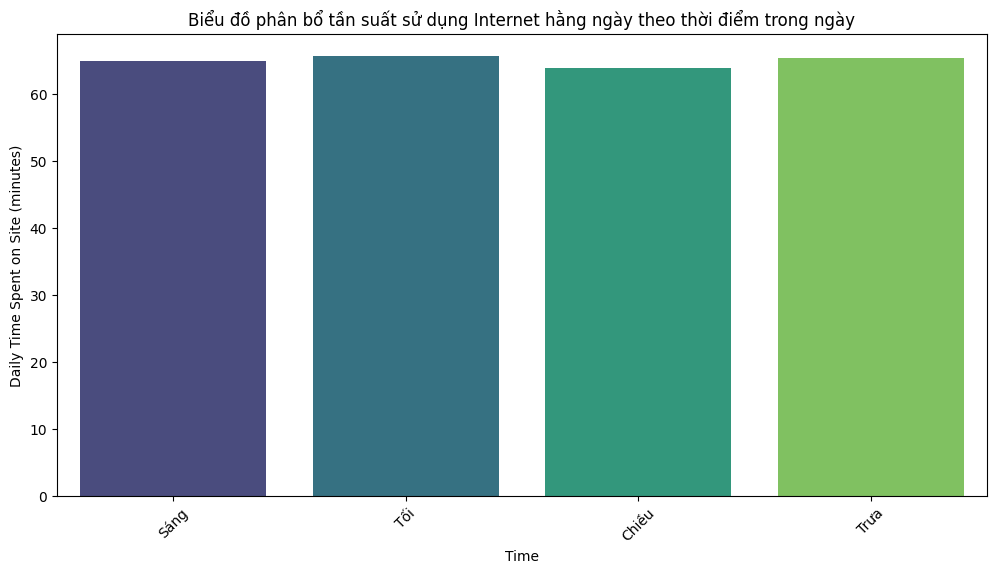

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Time Group', y='Daily Time Spent on Site', data=df_unique, palette='viridis', ci=None)
plt.title('Biểu đồ phân bổ tần suất sử dụng Internet hằng ngày theo thời điểm trong ngày')
plt.xlabel('Time')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-36-cbcadfdfdc1c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ad Topic Line', y='Daily Time Spent on Site', data=filtered_df, palette='viridis', ci=None)
<ipython-input-36-cbcadfdfdc1c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ad Topic Line', y='Daily Time Spent on Site', data=filtered_df, palette='viridis', ci=None)


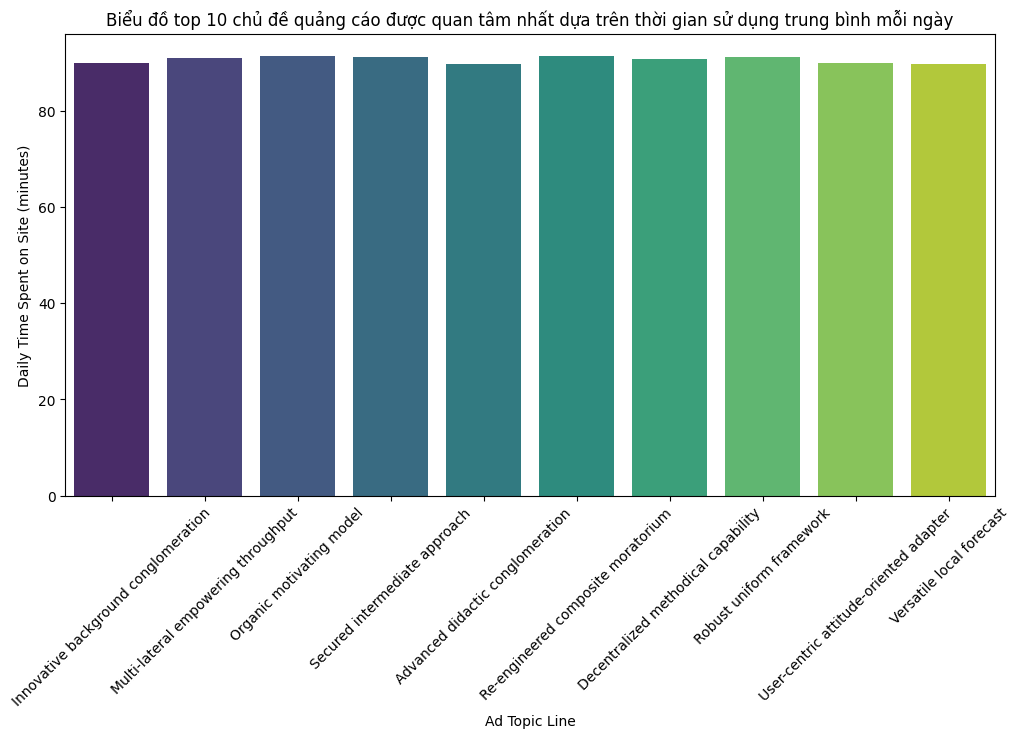

In [ ]:
avg_usage_by_topic = df_unique.groupby('Ad Topic Line')['Daily Time Spent on Site'].mean()

top_10_topics = avg_usage_by_topic.nlargest(10).index

filtered_df = df_unique[df_unique['Ad Topic Line'].isin(top_10_topics)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Ad Topic Line', y='Daily Time Spent on Site', data=filtered_df, palette='viridis', ci=None)
plt.title('Biểu đồ top 10 chủ đề quảng cáo được quan tâm nhất dựa trên thời gian sử dụng trung bình mỗi ngày')
plt.xlabel('Ad Topic Line')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.xticks(rotation=45)
plt.show()

# Dự đoán khả năng 1 người dùng có chọn xem quảng cáo được hiển thị hay không (lựa chọn và cài đặt thuật toán, cài đặt ít nhất 2 thuật toán để so sánh với nhau) + Đánh giá chất lượng mô hình sử dụng cross validation với các độ đo precision, recall, f1 trên tập train, test. Kết luận mô hình được lựa chọn
▪ Kiểm tra sự ảnh hưởng của thuộc tính thu nhập có ảnh hưởng đến mô
hình dự đoán trên hay không, giải thích và kết luận.

▪ Các thuộc tính nào có mối tương quan đến dự đoán khả năng
click/không vào quảng cáo?

In [ ]:
df_unique = df_unique[[col for col in df_unique.columns if col != 'Clicked on Ad'] + ['Clicked on Ad']]
df_unique

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Date,Time,Income Group,Month,Hour,Time Group,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,2016-03-27,0:53,60k-70k,3,0,Sáng,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,2016-04-04,1:39,60k-70k,4,1,Sáng,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,2016-03-13,20:35,50k-60k,3,20,Tối,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,2016-01-10,2:31,50k-60k,1,2,Sáng,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,2016-06-03,3:36,70k-80k,6,3,Sáng,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/2/2016 21:49,2016-02-11,21:49,70k-80k,2,21,Tối,1
997,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/4/2016 2:07,2016-04-22,2:07,60k-70k,4,2,Sáng,1
998,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/2/2016 17:24,2016-02-01,17:24,40k-50k,2,17,Chiều,1
999,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/3/2016 2:35,2016-03-24,2:35,40k-50k,3,2,Sáng,0


In [ ]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   float64 
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      1000 non-null   float64 
 4   Ad Topic Line             1000 non-null   object  
 5   City                      1000 non-null   object  
 6   Male                      1000 non-null   int64   
 7   Country                   1000 non-null   object  
 8   Timestamp                 1000 non-null   object  
 9   Date                      1000 non-null   object  
 10  Time                      1000 non-null   object  
 11  Income Group              1000 non-null   category
 12  Month                     1000 non-null   int32   
 13  Hour                      1000 non-null   int32   
 1

In [ ]:
df_unique.drop(['Ad Topic Line', 'City', 'Country', 'Income Group', 'Time Group', 'Hour', 'Date', 'Month', 'Time', 'Timestamp'], axis=1, inplace=True)
df_unique

<ipython-input-39-f13591c144fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.drop(['Ad Topic Line', 'City', 'Country', 'Income Group', 'Time Group', 'Hour', 'Date', 'Month', 'Time', 'Timestamp'], axis=1, inplace=True)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35.0,61833.90,256.09,0,0
1,80.23,31.0,68441.85,193.77,1,0
2,69.47,26.0,59785.94,236.50,0,0
3,74.15,29.0,54806.18,245.89,1,0
4,68.37,35.0,73889.99,225.58,0,0
...,...,...,...,...,...,...
996,72.97,30.0,71384.57,208.58,1,1
997,51.30,45.0,67782.17,134.42,1,1
998,51.63,51.0,42415.72,120.37,1,1
999,55.55,19.0,41920.79,187.95,0,0


In [ ]:
x1 = df_unique.iloc[:, :-1]
y1 = df_unique.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=1/3, random_state=0)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_with_const = sm.add_constant(x_train_scaled)

model = sm.Logit(y_train, x_train_with_const)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.093830
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  666
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                  0.8645
Time:                        06:46:30   Log-Likelihood:                -62.490
converged:                       True   LL-Null:                       -461.05
Covariance Type:            nonrobust   LLR p-value:                4.872e-170
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2648      0.438      5.176      0.000       1.407       3.122
x1            -3.1199      0

Accuracy on Test Set: 0.9731
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       181
           1       0.97      0.97      0.97       153

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334

Confusion Matrix on Test Set:


Text(0.5, 23.52222222222222, 'Dự báo')

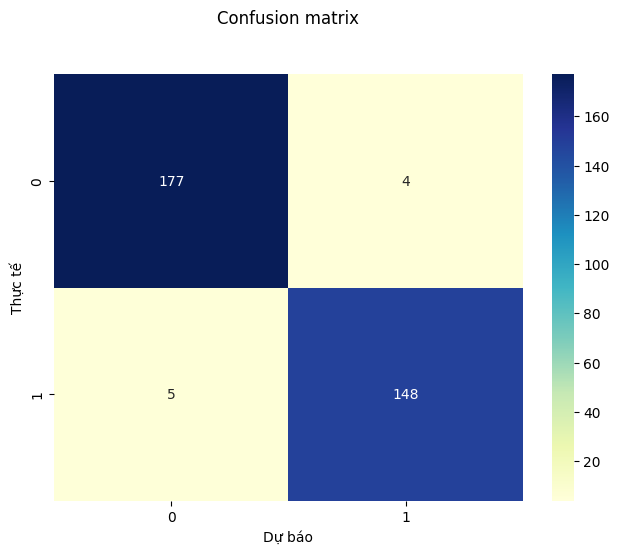

In [ ]:
# Khởi tạo mô hình Logistic Regression với tham số solver='liblinear' và max_iter=1000
regression = LogisticRegression(solver='liblinear', max_iter=1000)

# Huấn luyện mô hình với dữ liệu huấn luyện
regression.fit(x_train_scaled, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = regression.predict(x_test_scaled)

# Đánh giá mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Hiển thị báo cáo phân loại (precision, recall, f1-score) trên tập kiểm tra
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn trên tập kiểm tra
print("Confusion Matrix on Test Set:")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')


In [ ]:
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': 'accuracy'
}

# Cross-validation trên tập huấn luyện
cv_results = cross_validate(regression, x_train_scaled, y_train, cv=5, scoring=scoring)

print("Cross-Validation Results on Training Data:")
for metric, values in scoring.items():
    mean_score = cv_results[f'test_{metric}'].mean()
    std_score = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: Mean = {mean_score:.4f}, Std = {std_score:.4f}")

# Đánh giá trên tập kiểm tra
y_test_pred = regression.predict(x_test_scaled)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("\nEvaluation on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Cross-Validation Results on Training Data:
Precision: Mean = 0.9799, Std = 0.0190
Recall: Mean = 0.9626, Std = 0.0112
F1: Mean = 0.9710, Std = 0.0077
Accuracy: Mean = 0.9700, Std = 0.0082

Evaluation on Test Data:
Accuracy: 0.9731
Precision: 0.9737
Recall: 0.9673
F1-Score: 0.9705



Đánh giá mô hình ban đầu:
Accuracy on Test Set: 0.9671
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       181
           1       0.98      0.95      0.96       153

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334


K tối ưu nhất cho mô hình : 13

Đánh giá lại mô hình:
Accuracy on Test Set: 0.9731
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       181
           1       1.00      0.94      0.97       153

    accuracy                           0.97       334
   macro avg       0.98      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334



Text(0.5, 23.52222222222222, 'Dự báo')

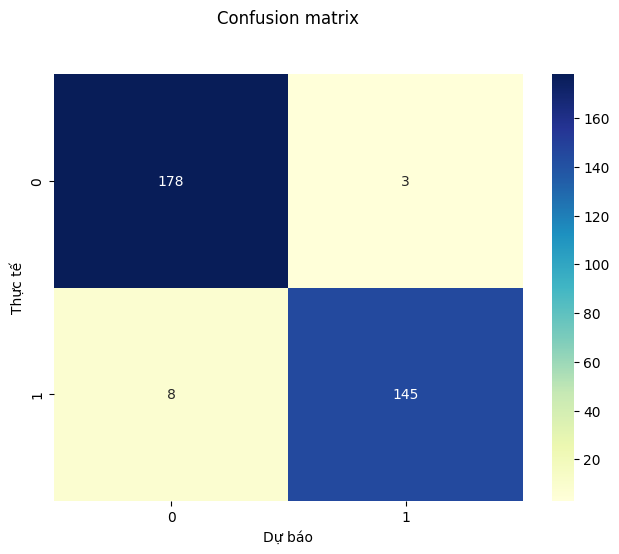

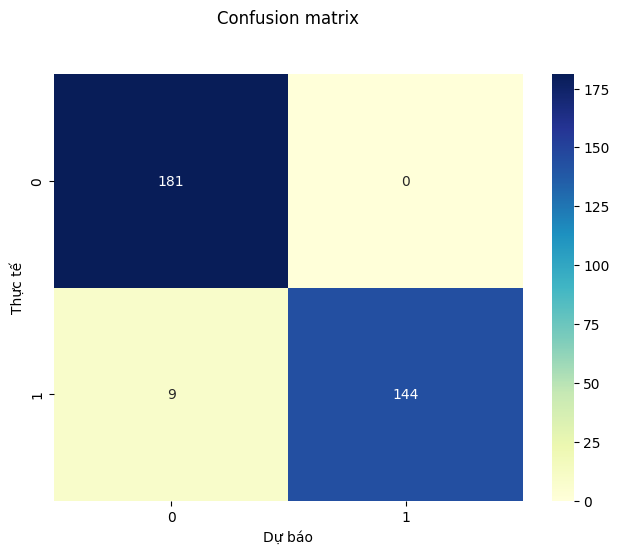

In [ ]:
#Chia dữ liệu thành tập huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=1/3, random_state=0)

#Chuẩn hóa dữ liệu để đảm bảo các đặc trưng có cùng thang đo
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Huấn luyện mô hình KNN ban đầu với n_neighbors=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scaled, y_train)

#Dự đoán và đánh giá trên tập kiểm tra
y_pred = knn_model.predict(x_test_scaled)

print("\nĐánh giá mô hình ban đầu:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')


#Tìm giá trị tối ưu của k bằng Grid Search
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"\nK tối ưu nhất cho mô hình : {best_k}")

#Huấn luyện lại với k tối ưu
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(x_train_scaled, y_train)

#Dự đoán và đánh giá trên tập kiểm tra
y_pred_optimal = optimal_knn.predict(x_test_scaled)

print("\nĐánh giá lại mô hình:")
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy on Test Set: {accuracy_optimal:.4f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_optimal))

cnf_matrix_optimal = metrics.confusion_matrix(y_test, y_pred_optimal)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_optimal), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')



In [ ]:
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': 'accuracy'
}

# Cross-validation trên tập huấn luyện
cv_results = cross_validate(optimal_knn, x_train_scaled, y_train, cv=5, scoring=scoring)


print("Cross-Validation Results on Training Data:")
for metric, values in scoring.items():
    mean_score = cv_results[f'test_{metric}'].mean()
    std_score = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: Mean = {mean_score:.4f}, Std = {std_score:.4f}")

# Đánh giá trên tập kiểm tra
y_test_pred = optimal_knn.predict(x_test_scaled)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("\nEvaluation on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Cross-Validation Results on Training Data:
Precision: Mean = 0.9911, Std = 0.0119
Recall: Mean = 0.9396, Std = 0.0188
F1: Mean = 0.9645, Std = 0.0087
Accuracy: Mean = 0.9640, Std = 0.0087

Evaluation on Test Data:
Accuracy: 0.9731
Precision: 1.0000
Recall: 0.9412
F1-Score: 0.9697
